In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #libreria para trabajar con gráficas
import seaborn as sns #libreria para trabajar con gráficas
from datetime import datetime #libreria que permite el tratamiento de variables tipo date


In [2]:
# # Carga el systema de archivos de Google Drive al directorio raíz de Google Colab

# from google.colab import drive
# drive.mount('/content/drive')

# # Lectura de un archivo en formato CSV y lo almacena en la variable icfes, convirtiéndolo en un DataFrame

# icfes= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MercyCorp/data/icfes_2020_reducido.csv')

Mounted at /content/drive


In [6]:
icfes = pd.read_csv('data/icfes_2020_reducido.csv')
icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100974 entries, 0 to 100973
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            100974 non-null  int64 
 1   ESTU_GENERO           100972 non-null  object
 2   ESTU_FECHANACIMIENTO  100974 non-null  object
 3   ESTU_TIENEETNIA       100363 non-null  object
 4   ESTU_DEPTO_RESIDE     100974 non-null  object
 5   FAMI_ESTRATOVIVIENDA  97576 non-null   object
 6   FAMI_EDUCACIONPADRE   98373 non-null   object
 7   FAMI_EDUCACIONMADRE   98267 non-null   object
 8   FAMI_TIENEINTERNET    98274 non-null   object
 9   FAMI_TIENECOMPUTADOR  96928 non-null   object
 10  COLE_NATURALEZA       100974 non-null  object
 11  COLE_AREA_UBICACION   100974 non-null  object
 12  COLE_JORNADA          100974 non-null  object
 13  PUNT_GLOBAL           100974 non-null  int64 
 14  ESTU_GENERACION-E     100974 non-null  object
dtypes: int64(2), obje

In [18]:
icfes.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [10]:
# Muestra la estadística descriptiva de los datos del DataFrame

icfes.describe()

,Unnamed: 0,PUNT_GLOBAL
count,100974.000000,100974.000000
mean,252481.857983,248.445986
std,145788.076596,48.741511
min,4.000000,0.000000
25%,126054.500000,211.000000
50%,252170.500000,245.000000
75%,379022.750000,282.000000
max,504868.000000,500.000000


In [19]:
# Muestra los 5 primeros registros del DataFrame

icfes.head()

,id,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E
0,453241,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO
1,387781,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO
2,77011,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD
3,135370,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO
4,31081,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO


<Axes: xlabel='id'>

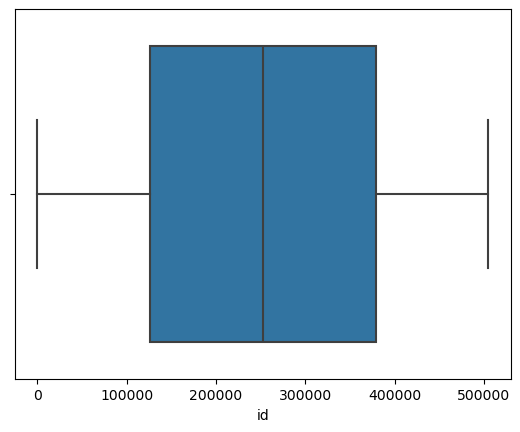

In [23]:
# Gráfica sencilla de una caja de bigotes utilizando la libreris seaborn

sns.boxplot(data=icfes, x='id')

In [22]:
# Cuenta el número de registros de la columna ESTU_GENERACION-E

icfes['ESTU_GENERACION-E'].nunique()

4

In [28]:
# Calcula el porcentaje de ocurrecia de cada combinación de la agrupación conformada por las columnas FAMI_TIENECOMPUTADOR y FAMI_TIENEINTERNET

icfes_grouped = icfes.groupby(['FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET'])
icfes_grouped.first()
# icfes.groupby(['FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET']).size()*100/len(icfes)

id ESTU_GENERO  \
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                       
No                   No                  246615           F   
                     Si                   77011           F   
Si                   No                  191664           F   
                     Si                  453241           M   

                                        ESTU_FECHANACIMIENTO ESTU_TIENEETNIA  \
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                                        
No                   No                           14/07/2004              No   
                     Si                           07/08/2002              Si   
Si                   No                           18/09/2003              No   
                     Si                           27/04/2002              No   

                                        ESTU_DEPTO_RESIDE  \
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                     
No                   No                         ANTIOQUIA   
                     Si                            NARIÑO   
Si                   No                             CAUCA   
                     Si                      CUNDINAMARCA   

                                        FAMI_ESTRATOVIVIENDA  \
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                        
No                   No                            Estrato 2   
                     Si                            Estrato 1   
Si                   No                            Estrato 1   
                     Si                            Estrato 3   

                                                    FAMI_EDUCACIONPADRE  \
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                                   
No                   No                             Primaria incompleta   
                     Si                  Educación profesional completa   
Si                   No                               Primaria completa   
                     Si                                         No sabe   

                                                          FAMI_EDUCACIONMADRE  \
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                                         
No                   No                  Secundaria (Bachillerato) incompleta   
                     Si                    Secundaria (Bachillerato) completa   
Si                   No                  Secundaria (Bachillerato) incompleta   
                     Si                                               No sabe   

                                        COLE_NATURALEZA COLE_AREA_UBICACION  \
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                                       
No                   No                         OFICIAL              URBANO   
                     Si                         OFICIAL              URBANO   
Si                   No                         OFICIAL               RURAL   
                     Si                         OFICIAL              URBANO   

                                        COLE_JORNADA  PUNT_GLOBAL  \
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                             
No                   No                     COMPLETA          218   
                     Si                       MAÑANA          226   
Si                   No                        UNICA          207   
                     Si                       MAÑANA          267   

                                                ESTU_GENERACION-E  
FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET                            
No                   No                                        NO  
                     Si                  GENERACION E - GRATUIDAD  
Si                   No                  GENERACION E - GRATUIDAD  
                     Si                                        NO

In [12]:
# Hace un conteo de los valores de la columna ESTU_GENERO, y muestra la proporción en términos porcentuales (frecuencia relativa) de cada valor
icfes.ESTU_GENERO.value_counts(normalize= True)

ESTU_GENERO
F    0.54835
M    0.45165
Name: proportion, dtype: float64

## CONVERSIÓN Y TRANSFORMACIÓN DE VARIABLES

In [13]:
#Lista las colomnas (series o variables) que componenen el DataFrame icfes
icfes.columns

Index(['Unnamed: 0', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'COLE_NATURALEZA', 'COLE_AREA_UBICACION', 'COLE_JORNADA', 'PUNT_GLOBAL',
       'ESTU_GENERACION-E', 'id'],
      dtype='object')

In [14]:
# Creación de una columna para eliminar la aparece en el DataFrame sin nombre
icfes['id']= icfes['Unnamed: 0']

In [ ]:
icfes.info()

In [15]:
#Eliminación de una columna (Serie)
icfes= icfes.drop(columns= 'Unnamed: 0')

###Transformación campo fecha

La columna ESTU_FECHANACIMIENTO hay que transformala, pues se encuentra como un campo de texto

In [16]:
#Muestra el tipo de datos que surge de la aplicación de la función datetime.strptime
type(datetime.strptime('27/06/2023', '%d/%m/%Y').weekday())

int

In [17]:
#Muestra el año que se encuentra en la cadena 26/06/2023 que es convertida en fecha a través de la función datetime.strptime()
datetime.strptime('26/06/2023', '%d/%m/%Y').year

2023

In [18]:
#crea una copia del dataframe original, para asegurar los datos
icfes_copia= icfes

In [20]:
#Muestra la fecha actual
datetime.now()

datetime.datetime(2024, 6, 4, 12, 6, 50, 567964)

In [19]:
#Función que calcula la edad que tenía el estudiante cuando presentó la prueba del ICFES en 09/08/1982
#recibe una cadena (String) y devuelve un número entero.

def calcular_edad(fecha_nacimiento: str)-> int:
  fecha_nacimiento_aux= datetime.strptime(fecha_nacimiento, '%d/%m/%Y')
  fecha_presentacion_prueba= datetime.strptime('09/08/2020', '%d/%m/%Y')
  edad= fecha_presentacion_prueba.year - fecha_nacimiento_aux.year
  return edad


In [21]:
#Llamado de la función calcular_edad()
calcular_edad("05/04/1966")

54

In [22]:
# Ejemplo que muestra cómo se crea un DataFrame
data= {'numeros': [1, 6, 7, 9]}
df= pd.DataFrame(data)

In [23]:
#Utiliza una función anónima llamada lambda que facilita la captura de los datos de la columna ESTU_FECHANACIMIENTO y los almacena en la variable x
#con estos valores hace el llamado a la función creada que calcula la edad de cada estudiante y los almacena en una nueva
icfes['ESTU_EDAD']= icfes['ESTU_FECHANACIMIENTO'].apply(lambda x: calcular_edad(x)) #lambda es una función anómina

In [24]:
#Realiza una segunda copia en icfes2 del Dataframe con la modificación de la creación de la columna ESTU_EDAD
icfes2= icfes

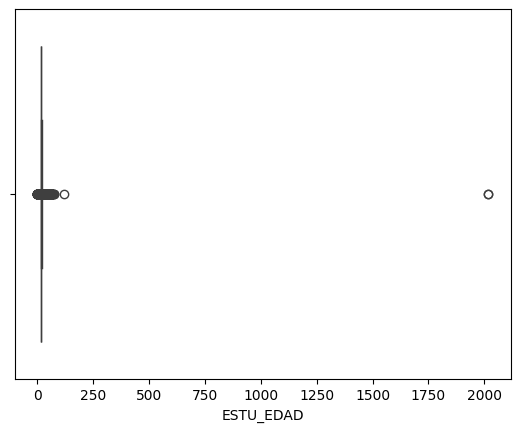

In [25]:
#Muestra un gráfico de caja de bigotes de la columna nueva ESTU_EDAD
sns.boxplot(data= icfes2,
            x='ESTU_EDAD');

In [ ]:
#Mustra un histograma de la variable ESTU_EDAD
plt.hist(icfes2['ESTU_EDAD']);

In [ ]:
icfes2.describe()

In [26]:
#Realiza un conteo de la frecuencia de los valores para cada edad
icfes2.ESTU_EDAD.value_counts(normalize= False)

ESTU_EDAD
17      42935
16      22437
18      20284
19       8276
20       2562
        ...  
73          1
2018        1
2017        1
5           1
120         1
Name: count, Length: 69, dtype: int64

In [27]:
#Se crean parámetros que permitan filtrar la información del DataFrame icfes2 con el propósito
#de eliminar las edades que se encuentran entre 0 y 14 y las que son mayores a 90 años
#y se crea un nuevo DataFrame icfes3 que guarda esta modificación

limite_inferior= 14
limite_superior= 90

icfes3=icfes2[
      (icfes2['ESTU_EDAD'] >= limite_inferior)
      &
      (icfes2['ESTU_EDAD'] < limite_superior)
      ]


In [ ]:
#Se revisan las entradas que quedaron en el nuevo DataFrame
icfes3.shape


In [28]:
#La función len() calcula el tamaño de los DataFrames para determinar la cantidad de registros que se eliminaron
#luego se calcula el porcentaje que representan estos datos eliminados

registros_eliminados= len(icfes) - len(icfes3)
porcentaje= registros_eliminados * 100 / len(icfes)
print(f'Se eliminaron {registros_eliminados} registros\nEquivalente a un {porcentaje}%')

Se eliminaron 63 registros
Equivalente a un 0.06239229900766534%


##Inspección y correción de valores faltantes
Es importante revisar los valores nulos con el ánimo de determinar cuál es la mejor opción para subsanar este inconveniente:
1. Eliminarlos por columna
2. Eliminarlos por filas
3. Imputación (moda o mediana)

In [30]:
#Se crea una copia con los cambios realizados
#El DataFrame icfes3 queda como más optimizado
icfes4= icfes3

In [31]:
#Se realiza la proporción porcentual que representan los datos nulos que
#que exiten en cada columna, usando axis= 0
icfes4.isnull().sum(axis= 0).sort_values(ascending= False)*100/len(icfes4)

FAMI_TIENECOMPUTADOR    4.004519
FAMI_ESTRATOVIVIENDA    3.363360
FAMI_EDUCACIONMADRE     2.677607
FAMI_TIENEINTERNET      2.671661
FAMI_EDUCACIONPADRE     2.572564
ESTU_TIENEETNIA         0.602511
ESTU_GENERO             0.001982
ESTU_FECHANACIMIENTO    0.000000
ESTU_DEPTO_RESIDE       0.000000
COLE_NATURALEZA         0.000000
COLE_AREA_UBICACION     0.000000
COLE_JORNADA            0.000000
PUNT_GLOBAL             0.000000
ESTU_GENERACION-E       0.000000
id                      0.000000
ESTU_EDAD               0.000000
dtype: float64

In [32]:
#Se realiza la proporción porcentual que representan los datos nulos que
#que exiten en cada fila, usando axis= 0

icfes4.isnull().sum(axis= 1).sort_values(ascending= False)*100/len(icfes4)

42274     0.005946
49436     0.005946
1838      0.005946
98525     0.005946
48923     0.005946
            ...   
34661     0.000000
34660     0.000000
34659     0.000000
34658     0.000000
100973    0.000000
Length: 100911, dtype: float64

In [33]:
#Se eliminan las columnas que tienen campos nulos utilizando la función dropna() y axis=1 para las columnas
#La salida se guarda en un nuevo DataFrame, icfes5,  que tendra esta nueva data.
icfes5= icfes4.dropna(axis= 1)
print(icfes4.shape)
print(icfes5.shape)

(100911, 16)
(100911, 9)


In [34]:
#Se revisa si existen campos nulos en columnas
icfes5.isnull().sum()

ESTU_FECHANACIMIENTO    0
ESTU_DEPTO_RESIDE       0
COLE_NATURALEZA         0
COLE_AREA_UBICACION     0
COLE_JORNADA            0
PUNT_GLOBAL             0
ESTU_GENERACION-E       0
id                      0
ESTU_EDAD               0
dtype: int64

In [35]:
#Se calcula el número de datos eliminados restando los tamaños de las DataFrames icfes4 e icfes5
icfes4.size - icfes5.size

706377

In [36]:
#Se eliminan las filas que tienen campos nulos utilizando la función dropna() y axis=0 para las filas
#La salida se guarda en un nuevo DataFrame, icfes6,  que tendra esta nueva data.
icfes6= icfes4.dropna(axis= 0)
print(icfes4.shape)
print(icfes6.shape)

(100911, 16)
(94860, 16)


In [37]:
#Se calcula el número de datos eliminados restando los tamaños de las DataFrames icfes4 e icfes6
icfes4.size - icfes6.size

96816

In [39]:
#Se suman los campos nulos que existen por cada fila independiente
icfes4.isnull().sum(axis=1).value_counts()

0    94860
1     3266
5     2301
2      330
3       68
4       56
6       30
Name: count, dtype: int64

In [40]:
#Se filtran aquellas filas que tienen menor o igual a 5 campos nulos.
#y se almancenan en un nuevo DataFrama icfes7

icfes7=icfes4[icfes4.isnull().sum(axis=1)<=5]

In [41]:
#Se revisan las entradas que quedan en el nuevo DataFrame
icfes7.shape

(100881, 16)

In [42]:
#se calcula el porcentaje que representa los datos eliminados desde el DataFrame icfes4 hasta el DataFrame icfes
(icfes4.size - icfes7.size) *100/(icfes4.size)

0.02972916728602432

In [43]:
#Genera la proporción que representan los datos nulos en cada columna el DataFrame icfes7
icfes7.isnull().sum().sort_values(ascending= False)*100 /len(icfes7)

FAMI_TIENECOMPUTADOR    3.975972
FAMI_ESTRATOVIVIENDA    3.334622
FAMI_EDUCACIONMADRE     2.648665
FAMI_TIENEINTERNET      2.642718
FAMI_EDUCACIONPADRE     2.543591
ESTU_TIENEETNIA         0.572952
ESTU_GENERO             0.001983
ESTU_FECHANACIMIENTO    0.000000
ESTU_DEPTO_RESIDE       0.000000
COLE_NATURALEZA         0.000000
COLE_AREA_UBICACION     0.000000
COLE_JORNADA            0.000000
PUNT_GLOBAL             0.000000
ESTU_GENERACION-E       0.000000
id                      0.000000
ESTU_EDAD               0.000000
dtype: float64

#"Imputación
Este procedimiento permite reemplazar los campos nulos por la moda calculada para cada columna o variable.

Vamos a relizar una imputación  por la moda para la columna ESTU_TIENEETNIA

In [44]:
#Ejemplo de como se imputan los valores nulos que existen en la columna FAMI_EDUCAIONPADRE, generando
#la proporción que representan en sus distintos valores. Ello permite identificar la proporción de los valores nulos.

icfes7['FAMI_EDUCACIONPADRE'].value_counts(normalize= True, dropna= False)

FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      0.238449
Primaria incompleta                     0.183751
Secundaria (Bachillerato) incompleta    0.129271
Educación profesional completa          0.092366
Primaria completa                       0.091078
Técnica o tecnológica completa          0.064670
No sabe                                 0.058614
Ninguno                                 0.041366
NaN                                     0.025436
Educación profesional incompleta        0.020093
Técnica o tecnológica incompleta        0.019984
Postgrado                               0.019359
No Aplica                               0.015563
Name: proportion, dtype: float64

In [45]:
#Otro ejemplo de como se imputan los valores nulos que existen en la columna FAMI_EDUCAIONMADRE, generando
#la proporción que representan en sus distintos valores. Ello permite identificar la proporción de los valores nulos.
icfes7['FAMI_EDUCACIONMADRE'].value_counts(normalize= True, dropna= False)

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      0.275037
Primaria incompleta                     0.142762
Secundaria (Bachillerato) incompleta    0.134951
Educación profesional completa          0.111855
Técnica o tecnológica completa          0.098264
Primaria completa                       0.090562
Técnica o tecnológica incompleta        0.029887
NaN                                     0.026487
Educación profesional incompleta        0.024871
Ninguno                                 0.024197
Postgrado                               0.022185
No sabe                                 0.017000
No Aplica                               0.001943
Name: proportion, dtype: float64

In [46]:
#Se realiza la imputación en el campo ESTU_TIENETNIA, rellenando los campos nulos con la moda de la columna.

icfes7['ESTU_TIENEETNIA']= icfes7['ESTU_TIENEETNIA'].fillna(value= 'No')

<ipython-input-46-6980490c1d62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icfes7['ESTU_TIENEETNIA']= icfes7['ESTU_TIENEETNIA'].fillna(value= 'No')


In [47]:
#Se crea un diccionadio con tres columnas, que son las claves, y sus valores es la información que rellenará los valores nulos.
#como ejemplo para hacer un proceso un poco masivo de la imputación
#Esta imputación se almcena en un nuevo DataFram icfes8
valores_imputar={
          'ESTU_TIENEETNIA': 'No',
          'FAMI_EDUCACIONPADRE': 'Secundaria (Bachillerato) completa',
          'FAMI_EDUCACIONMADRE': 'Secundaria (Bachillerato) completa'
          }

icfes8= icfes7.fillna(value= valores_imputar)

In [48]:
#Se revisa si existen campos nulos en filas
icfes8.isnull().sum()

ESTU_GENERO                2
ESTU_FECHANACIMIENTO       0
ESTU_TIENEETNIA            0
ESTU_DEPTO_RESIDE          0
FAMI_ESTRATOVIVIENDA    3364
FAMI_EDUCACIONPADRE        0
FAMI_EDUCACIONMADRE        0
FAMI_TIENEINTERNET      2666
FAMI_TIENECOMPUTADOR    4011
COLE_NATURALEZA            0
COLE_AREA_UBICACION        0
COLE_JORNADA               0
PUNT_GLOBAL                0
ESTU_GENERACION-E          0
id                         0
ESTU_EDAD                  0
dtype: int64

In [49]:
# Se borra el DataFrame icfes8 para realizar el proceso masivo de los campos cualitativos
icfes8= []

In [50]:
#Se crea una función que permita la imputación de todos los campos cualitativos
#recibe un DataFrame y la lista de las campos cualitativos.
#la función toma cada valor de la lista y rellena los campos nulos de ese columna
#con la moda calculada

def imputar_moda(df, variables_cualitativas):
  df_salida= df

  for variable in variables_cualitativas:
    moda_variable= df_salida[variable].mode()[0]
    df_salida[variable].fillna(moda_variable, inplace= True)
  return df_salida

In [51]:
#Se crea una lista con los campos cualitativos del DataFrame icfes7
#se almacenan en la variable variables_cualitativas y se llama a la función imputar_moda()
#y esta modifiación se guarda en el DataFrame icfes8, realizado en la función

variables_cualitativas= list(icfes7.select_dtypes('object').columns)
icfes8= imputar_moda(df= icfes7,
                     variables_cualitativas= variables_cualitativas)

<ipython-input-50-b92a77824a5f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salida[variable].fillna(moda_variable, inplace= True)


In [52]:
#Se revisan los campos nulos que existen en el nuevo DataFrame icfes8, calculando su proporción

icfes8.isnull().sum().sort_values(ascending= False)*100 / len(icfes8)

ESTU_GENERO             0.0
ESTU_FECHANACIMIENTO    0.0
ESTU_TIENEETNIA         0.0
ESTU_DEPTO_RESIDE       0.0
FAMI_ESTRATOVIVIENDA    0.0
FAMI_EDUCACIONPADRE     0.0
FAMI_EDUCACIONMADRE     0.0
FAMI_TIENEINTERNET      0.0
FAMI_TIENECOMPUTADOR    0.0
COLE_NATURALEZA         0.0
COLE_AREA_UBICACION     0.0
COLE_JORNADA            0.0
PUNT_GLOBAL             0.0
ESTU_GENERACION-E       0.0
id                      0.0
ESTU_EDAD               0.0
dtype: float64

# Visualización

Primero veremos algunas funcionalidades importantes de Matplolib. Cabe aclarar que el enfoque de este Notebook se dará a la visualización usando Seaborn, antes de eso veremos los métodos y objetos comunes en ambas librerías y su manipulación.

Este es método funcional, es la primera y la forma más simple de hacer gráficas con Matplotlib. Los parámetros de la función son controlados a través de funciones como `hist(), xlabel() y show()`. Recuerde que en este caso para llamar las funciones es vital el alias plt.

Existen una gran cantidad de tipos de gráficos posibles, a continuación se listan los más comunes.

`hist()`

`plot()`

`scatter()`

`barplot()`

`boxplot()`

# Histogramas

Con el histograma podemos hacer tanto análisis univariado como bivariado. Con este tipo de visualización se busca conocer y describir la distribución de variables cuantitativas, es valiosa también para la busqueda de valores atípicos.

In [58]:
icfes8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100881 entries, 0 to 100973
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ESTU_GENERO           100881 non-null  object
 1   ESTU_FECHANACIMIENTO  100881 non-null  object
 2   ESTU_TIENEETNIA       100881 non-null  object
 3   ESTU_DEPTO_RESIDE     100881 non-null  object
 4   FAMI_ESTRATOVIVIENDA  100881 non-null  object
 5   FAMI_EDUCACIONPADRE   100881 non-null  object
 6   FAMI_EDUCACIONMADRE   100881 non-null  object
 7   FAMI_TIENEINTERNET    100881 non-null  object
 8   FAMI_TIENECOMPUTADOR  100881 non-null  object
 9   COLE_NATURALEZA       100881 non-null  object
 10  COLE_AREA_UBICACION   100881 non-null  object
 11  COLE_JORNADA          100881 non-null  object
 12  PUNT_GLOBAL           100881 non-null  int64 
 13  ESTU_GENERACION-E     100881 non-null  object
 14  id                    100881 non-null  int64 
 15  ESTU_EDAD             

''

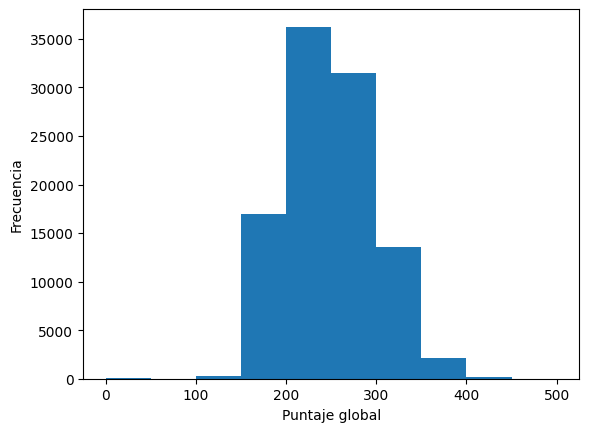

In [53]:
#Se genera una gráfica Histograma

plt.hist(icfes8['PUNT_GLOBAL'])
plt.xlabel('Puntaje global')
plt.ylabel('Frecuencia')

;

Ahora, veremos el segundo método para trabajar con matplotlib, este es el más poderoso y más usado. El método orientado a objetos es especialmente útil para crear canvas con varios gráficos en el. Esta lógica consiste en declarar un objeto de clase *figure* y luego emplear algunos métodos o atributos sobre este objeto.

Primero se crea un `Figure`, este es un canvas o área de trabajo en limpio, este es un contenedor de todo lo que vemos en pantalla. Luego se agregan gráficos internos o ejes, que se conocen como `axes`, esta parte es la encargada de sostener los datos.


<ipython-input-57-ff57055b6314>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= icfes8,
<ipython-input-57-ff57055b6314>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= icfes8,


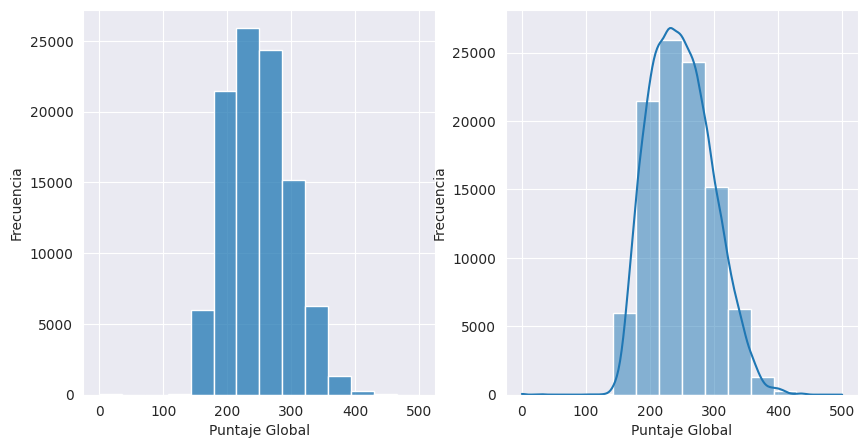

In [57]:
#Se genera un histograma utilizando un lienzo de dos columnas.
#Se utiliza el atributo kde para graficar una curva

fig, ax= plt.subplots(1,2, figsize= (10, 5))
sns.set_style('darkgrid')
sns.histplot(data= icfes8,
            x= 'PUNT_GLOBAL',
            bins= 14,
            palette= 'inferno',
            ax= ax[0])

ax[0].set_xlabel('Puntaje Global')
ax[0].set_ylabel('Frecuencia')
sns.histplot(data= icfes8,
            x= 'PUNT_GLOBAL',
            bins= 14,
            kde= True,
            palette= 'inferno',
            ax= ax[1])

ax[1].set_xlabel('Puntaje Global')
ax[1].set_ylabel('Frecuencia');

<Axes: xlabel='PUNT_GLOBAL'>

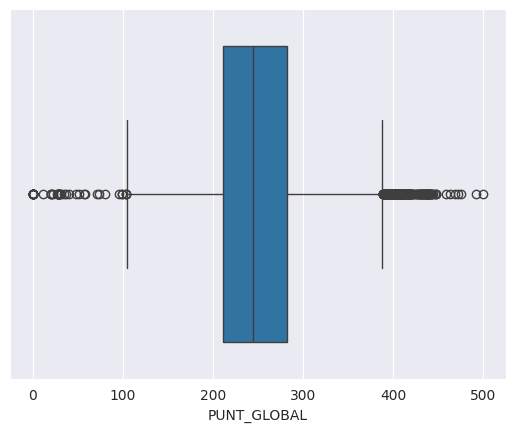

In [56]:
#Se genera una gráfica de caja y bigote

sns.boxplot( data= icfes8,
           x='PUNT_GLOBAL'
            )

Por último, durante el proceso de análisis y manipulación de datos resulta útil generar gráficas de procesamiento o cálculos realizados sobre los datos, pandas y su integración con matplotlib permite graficar directamente desde objetos DataFrame, a continuación se muestra un ejemplo.


#Seaborn

Seaborn es una librería de Python orientada a la construcción de visualizaciones, Seaborn está construida sobre matplotlib, por lo tanto, las propiedades vistas previamente también serán aplicables sobre Seaborn. Esta libreria permite construir visualizaciones muy atractivas con poco código y facilidad.

Text(0, 0.5, 'largo del pétalo')

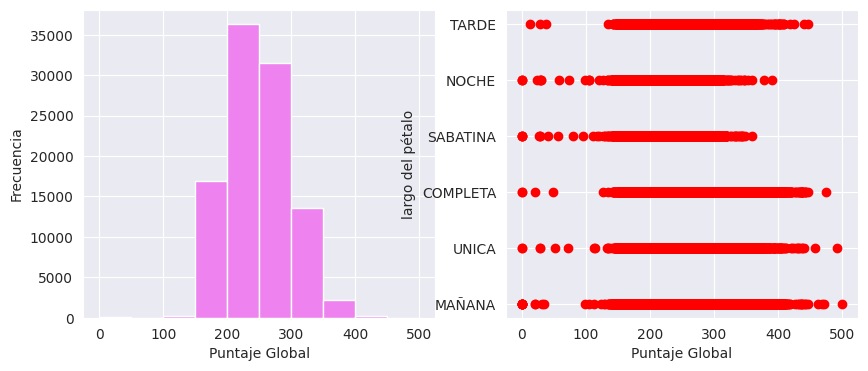

In [62]:
fig, axes = plt.subplots (1,2, figsize = (10,4)) # Aumentamos el tamaño del lienzo

axes[0].hist(icfes['PUNT_GLOBAL'],  # datos
             bins = 10,             # cantidad de barras
             #kde= True,
             color = 'violet');     # color
axes[0].set_xlabel('Puntaje Global')
axes[0].set_ylabel('Frecuencia')


# Grafica 2, diagrama de dispersión. Todo se agrega sobre axes[1]

axes[1].scatter(icfes['PUNT_GLOBAL'], # grafico de dispersion
             icfes['COLE_JORNADA'],
             marker = 'o',            # se puede modificar el marcador
             color = 'red');
axes[1].set_xlabel('Puntaje Global')
axes[1].set_ylabel('Jornada de Estudio')

In [3]:
plt.hist(icfes8['PUNT_GLOBAL'], kind= 'bar')
plt.xlabel('Puntaje global')
plt.ylabel('Frecuencia')

NameError: name 'icfes8' is not defined